# SET/RESET final conductance sweeps

We test the effect of pulses with different VBL/VSL on final conductance gf.

In [8]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set VDDIO
vddio = 33


## SET sweep

In [9]:
# Load SET sweep data
setdata = pd.read_csv(f"../data/sweep/set_sweep.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vbl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
setdata = pd.concat([setdata[["addr","t","vwl","vbl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
setdata

,addr,t,vwl,vbl,pw,gi,gf
0,41414,1.700592e+09,0,0,1,13,13
1,22112,1.700592e+09,0,1,1,12,12
2,8360,1.700592e+09,0,2,1,14,15
3,4998,1.700592e+09,0,3,1,18,23
4,28691,1.700592e+09,0,4,1,13,19
...,...,...,...,...,...,...,...
65403,41362,1.700595e+09,0,3,1,11,9
65404,29776,1.700595e+09,0,4,1,12,34
65405,32222,1.700595e+09,0,5,1,13,33
65406,44053,1.700595e+09,0,6,1,12,12


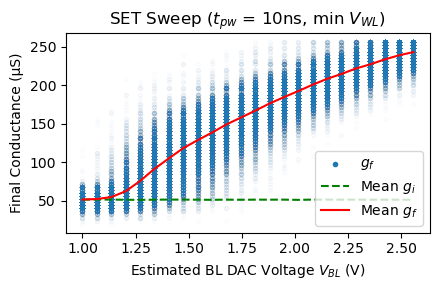

In [10]:
# Plot SET sweep
d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 1) & (setdata["vwl"] == 0)][["vwl","vbl","pw","gi","gf"]].sample(100000)
d["vbl"] = (d["vbl"]*2.1/31) + 1
fig = plt.figure(figsize=(4.5,3))
ax = plt.axes()
ax.scatter(d["vbl"], d["gf"]*4, marker=".", alpha=0.01, label="$g_f$")
(d.groupby("vbl")["gi"].mean() * 4).plot(color="green", linestyle="--", label="Mean $g_i$")
(d.groupby("vbl")["gf"].mean() * 4).plot(color="red", label="Mean $g_f$")
ax.set_title(f"SET Sweep ($t_{{pw}}$ = 10ns, min $V_{{WL}}$)", y=1)
ax.set_xlabel("Estimated BL DAC Voltage $V_{BL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
legend = ax.legend(loc="lower right")
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/setsweep{vddio}_bl.png", dpi=300)

### RESET sweep

In [11]:
# Load RESET sweep data
resetdata = pd.read_csv(f"../data/sweep/reset_sweep.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vsl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
resetdata = pd.concat([resetdata[["addr","t","vwl","vsl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
resetdata

,addr,t,vwl,vsl,pw,gi,gf
0,3276,1.700537e+09,0,0,1,47,46
1,29620,1.700537e+09,0,1,1,44,44
2,3105,1.700537e+09,0,2,1,57,57
3,54651,1.700537e+09,0,3,1,30,28
4,29301,1.700537e+09,0,4,1,53,53
...,...,...,...,...,...,...,...
174344,28774,1.700545e+09,0,20,1,20,18
174345,30812,1.700545e+09,0,21,1,13,13
174346,4863,1.700545e+09,0,22,1,16,13
174347,20098,1.700545e+09,0,23,1,13,17


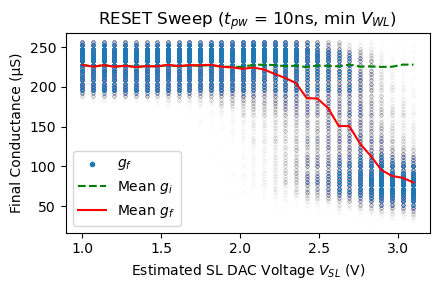

In [12]:
# Plot RESET sweep
d = resetdata[(resetdata["gi"].isin(range(48,64))) & (resetdata["pw"] == 1) & (resetdata["vwl"] == 0)][["vwl","vsl","pw","gi","gf"]].sample(100000)
d["vsl"] = (d["vsl"]*2.1/31) + 1
fig = plt.figure(figsize=(4.5,3))
ax = plt.axes()
ax.scatter(d["vsl"], d["gf"]*4, marker=".", alpha=0.002, label="$g_f$")
(d.groupby("vsl")["gi"].mean() * 4).plot(color="green", linestyle="--", label="Mean $g_i$")
(d.groupby("vsl")["gf"].mean() * 4).plot(color="red", label="Mean $g_f$")
ax.set_title(f"RESET Sweep ($t_{{pw}}$ = 10ns, min $V_{{WL}}$)", y=1)
ax.set_xlabel("Estimated SL DAC Voltage $V_{SL}$ (V)")
ax.set_ylabel("Final Conductance (μS)")
legend = ax.legend()
for lh in legend.legend_handles: 
    lh.set_alpha(1)
plt.tight_layout()
plt.savefig(f"figs/resetsweep{vddio}_sl.png", dpi=300)